In [1]:
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from pandasai.llm.openai import OpenAI
from examples.data.aml import dataframe
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
load_dotenv()

# Dapatkan API key dari variabel lingkungan
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
# Inisialisasi OpenAI dengan API key yang dibaca
llm = OpenAI()

In [3]:
#contoh sumber data yang berasal dari file csv yang disimpan di examples/data/Loan payments data.csv
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
pandas_ai = PandasAI(llm, verbose=True)
df = dataframe

### memeriksa dataframe berhasil di load atau tidak


In [4]:
import pandas as pd

try:
    df = dataframe
    print("Data berhasil dimuat!")
except FileNotFoundError:
    print("File tidak ditemukan!")
except Exception as e:
    print("Terjadi kesalahan saat memuat data: ", e)


Data berhasil dimuat!


In [10]:
pandas_ai.run(df, 'detecting pottentially illicit behavior dengan menggunakan logistic regression')

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming the dataframe is already loaded as df
# df = pd.read_csv("your_data.csv")

# Preparing the data
X = df.drop(['Timestamp', 'Account', 'Account.1', 'Is Laundering'], axis=1)
y = df['Is Laundering']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the logistic regression model
log_reg = LogisticRegression()

# Fitting the model with the training data
log_reg.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, 

'Untuk mendeteksi perilaku yang berpotensi ilegal, kita bisa menggunakan metode logistic regression. Logistic regression adalah teknik analisis statistik yang digunakan untuk memprediksi probabilitas suatu kejadian berdasarkan satu atau lebih variabel independen. Dalam konteks ini, kita akan mencoba memprediksi kemungkinan seseorang terlibat dalam aktivitas ilegal berdasarkan beberapa faktor, seperti usia, pendidikan, riwayat pekerjaan, dan sebagainya.\n\nDengan mengumpulkan data dari berbagai sumber dan mengidentifikasi variabel yang relevan, kita dapat melatih model logistic regression untuk mengenali pola yang mungkin menunjukkan perilaku ilegal. Setelah model dilatih, kita dapat menggunakannya untuk memprediksi probabilitas seseorang terlibat dalam aktivitas ilegal berdasarkan informasi yang kita miliki tentang mereka.\n\nNamun, perlu diingat bahwa logistic regression bukanlah alat yang sempurna dan mungkin tidak selalu akurat dalam memprediksi perilaku ilegal. Selalu penting untuk

In [9]:
pandas_ai.run(df, 'Deteksi outlier atau transaksi tidak biasa menggunakan metode Z-score, simpan hasilnya dalam file csv')

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd

# Load the dataframe
# df = pd.read_csv("your_data.csv") # Uncomment this line and replace "your_data.csv" with your actual file name

# Calculate Z-scores for Amount Received and Amount Paid columns
df['Z_score_received'] = (df['Amount Received'] - df['Amount Received'].mean()) / df['Amount Received'].std()
df['Z_score_paid'] = (df['Amount Paid'] - df['Amount Paid'].mean()) / df['Amount Paid'].std()

# Filter the outliers using a threshold (e.g., 3 standard deviations)
threshold = 3
outliers = df[(df['Z_score_received'].abs() > threshold) | (df['Z_score_paid'].abs() > threshold)]

# Save the outliers to a CSV file
outliers.to_csv("outliers.csv", index=False)
```

Code running:
```
df['Z_score_received'] = (df['Amount Received'] - df['Amount Received'].mean()
    ) / df['Amount Received'].std()
df['Z_score_paid'] = (df['Amount Paid'] - df['Amount Paid'].mean()) / df[
    'Amount Paid'].std()
threshold = 3
out

'Untuk mendeteksi outlier atau transaksi tidak biasa menggunakan metode Z-score, Anda perlu mengikuti langkah-langkah berikut dan menyimpan hasilnya dalam file CSV:\n\n1. Pertama, siapkan data transaksi Anda dalam format yang sesuai, misalnya dalam file Excel atau CSV.\n\n2. Selanjutnya, impor data ke dalam lingkungan pemrograman yang Anda gunakan, seperti Python atau R. Anda bisa menggunakan library seperti pandas (Python) atau readr (R) untuk membaca file CSV.\n\n3. Hitung rata-rata (mean) dan standar deviasi dari data transaksi Anda. Ini akan digunakan untuk menghitung Z-score.\n\n4. Sekarang, hitung Z-score untuk setiap transaksi dengan rumus berikut: Z-score = (nilai transaksi - mean) / standar deviasi. Nilai Z-score ini menunjukkan seberapa jauh suatu transaksi dari rata-rata dalam satuan standar deviasi.\n\n5. Tentukan ambang batas Z-score untuk mengidentifikasi outlier. Misalnya, Anda dapat memilih ambang batas 2 atau 3, yang berarti transaksi dengan Z-score lebih besar dari 2 

In [11]:
# tampilkan data head 5 bari pertama
df.head()


,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Z_score_received,Z_score_paid
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0,-0.005770,-0.005180
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0,-0.005774,-0.005184
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0,-0.005760,-0.005168
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0,-0.005771,-0.005181
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0,-0.005739,-0.005142


In [12]:
pandas_ai.run(df, 'Hitung jumlah transaksi untuk setiap akun. Tunjukkan akun dengan jumlah transaksi yang sangat tinggi')

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd

# Load the dataframe
# df = pd.read_csv("your_file.csv")  # Uncomment this line and replace "your_file.csv" with your actual file name

# Count transactions for each account
transaction_counts = df['Account'].value_counts()

# Show accounts with high transaction counts
high_transactions = transaction_counts[transaction_counts > transaction_counts.mean() + 2 * transaction_counts.std()]
print(high_transactions)
```

Code running:
```
transaction_counts = df['Account'].value_counts()
high_transactions = transaction_counts[transaction_counts > 
    transaction_counts.mean() + 2 * transaction_counts.std()]
print(high_transactions)
```
Answer: Account
100428660    168672
1004286A8    103018
100428978     20497
1004286F0     18663
100428780     17264
1004289C0     16794
100428810     16426
1004287C8     14174
100428738     13756
100428A51     13073
1004288A0     12330
100428858     11000
1004288E8      9471
100428A0

'Berikut ini adalah daftar akun dengan jumlah transaksi yang sangat tinggi:\n\n1. Akun 100428660 memiliki 168,672 transaksi.\n2. Akun 1004286A8 memiliki 103,018 transaksi.\n3. Akun 100428978 memiliki 20,497 transaksi.\n4. Akun 1004286F0 memiliki 18,663 transaksi.\n5. Akun 100428780 memiliki 17,264 transaksi.\n6. Akun 1004289C0 memiliki 16,794 transaksi.\n7. Akun 100428810 memiliki 16,426 transaksi.\n8. Akun 1004287C8 memiliki 14,174 transaksi.\n9. Akun 100428738 memiliki 13,756 transaksi.\n10. Akun 100428A51 memiliki 13,073 transaksi.\n11. Akun 1004288A0 memiliki 12,330 transaksi.\n12. Akun 100428858 memiliki 11,000 transaksi.\n13. Akun 1004288E8 memiliki 9,471 transaksi.\n14. Akun 100428A08 memiliki 8,290 transaksi.\n15. Akun 100428930 memiliki 6,431 transaksi.\n\nDari daftar di atas, kita dapat melihat bahwa akun dengan jumlah transaksi yang sangat tinggi adalah akun 100428660 dan 1004286A8.'

In [15]:
pandas_ai.run(df,  'hitung berapa banyak akun lain yang telah berinteraksi dengan setiap akun. Identifikasi akun yang telah berinteraksi dengan sejumlah besar akun lain. Kemudian, simpan hasilnya dalam file CSV dengan nama "num_accounts_interacted.csv".')

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd

# Load the dataframe df = dataframe
# Assuming the dataframe is already loaded as df

# Combine 'From Bank' and 'Account' columns, and 'To Bank' and 'Account.1' columns
df['from_account'] = df['From Bank'].astype(str) + '_' + df['Account']
df['to_account'] = df['To Bank'].astype(str) + '_' + df['Account.1']

# Find unique interactions between accounts
unique_interactions = df[['from_account', 'to_account']].drop_duplicates()

# Count the number of unique interactions for each account
interaction_counts = unique_interactions['from_account'].append(unique_interactions['to_account']).value_counts()

# Save the result to a CSV file
interaction_counts.to_csv('num_accounts_interacted.csv', header=['num_interactions'])
```

Code running:
```
df['from_account'] = df['From Bank'].astype(str) + '_' + df['Account']
df['to_account'] = df['To Bank'].astype(str) + '_' + df['Account.1']
unique_interactions = df[['from_accou

'Untuk menghitung berapa banyak akun lain yang telah berinteraksi dengan setiap akun, Anda perlu mengumpulkan data interaksi antara akun-akun tersebut. Setelah Anda memiliki data tersebut, Anda bisa menghitung jumlah akun yang berinteraksi dengan setiap akun.\n\nSetelah mengidentifikasi akun yang telah berinteraksi dengan sejumlah besar akun lain, Anda dapat menyimpan hasilnya dalam file CSV. Untuk melakukannya, Anda bisa menggunakan perangkat lunak seperti Microsoft Excel atau Google Sheets, atau bahkan menggunakan bahasa pemrograman seperti Python atau R untuk mengolah data dan menyimpannya dalam format CSV.\n\nBerikut adalah langkah-langkah untuk menyimpan hasilnya dalam file CSV dengan nama "num_accounts_interacted.csv":\n\n1. Buka perangkat lunak pengolah data seperti Microsoft Excel atau Google Sheets.\n2. Masukkan data interaksi akun yang telah Anda kumpulkan ke dalam lembar kerja.\n3. Hitung jumlah akun yang berinteraksi dengan setiap akun dan masukkan hasilnya dalam kolom baru

In [16]:
df['from_account'] = df['From Bank'].astype(str) + '_' + df['Account']
df['to_account'] = df['To Bank'].astype(str) + '_' + df['Account.1']
unique_interactions = df[['from_account', 'to_account']].drop_duplicates()
interaction_counts = unique_interactions['from_account'].append(
    unique_interactions['to_account']).value_counts()
interaction_counts.to_csv('num_accounts_interacted.csv', header=[
    'num_interactions'])

AttributeError: 'Series' object has no attribute 'append'

In [17]:
pandas_ai.run(df,'analisis transaksi yang terjadi dalam data dan cari pola dimana uang dipindahkan dengan cepat antar akun dalam waktu yang singkat. Hitung berapa kali ini terjadi untuk setiap akun dan simpan hasilnya dalam file CSV yang bernama rapid_movement.csv')

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd

# Load the dataframe df = dataframe
# Assuming the dataframe is already loaded as 'df'

# Convert Timestamp column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort the dataframe by Timestamp
df = df.sort_values(by='Timestamp')

# Create a new column 'from_to_account' combining 'From Bank', 'Account', 'To Bank', and 'Account.1'
df['from_to_account'] = df['From Bank'].astype(str) + '_' + df['Account'] + '_' + df['To Bank'].astype(str) + '_' + df['Account.1']

# Group the dataframe by 'from_to_account' and calculate the time difference between consecutive transactions
df['time_diff'] = df.groupby('from_to_account')['Timestamp'].diff()

# Filter the dataframe for rapid movements (less than or equal to 5 minutes)
rapid_movements = df[df['time_diff'] <= pd.Timedelta(minutes=5)]

# Count the number of rapid movements for each account
rapid_movement_counts = rapid_movements['from_to_accoun

'Untuk menganalisis transaksi dalam data dan mencari pola di mana uang dipindahkan dengan cepat antar akun dalam waktu yang singkat, Anda perlu mengikuti langkah-langkah berikut:\n\n1. Pertama, impor data transaksi ke dalam format yang dapat dianalisis, seperti pandas DataFrame jika Anda menggunakan Python.\n2. Kemudian, tentukan batasan waktu yang dianggap sebagai "waktu singkat" untuk mengidentifikasi pergerakan uang yang cepat.\n3. Selanjutnya, iterasi melalui setiap transaksi dalam data dan periksa apakah perbedaan waktu antara transaksi berturut-turut kurang dari atau sama dengan batasan waktu yang telah ditentukan.\n4. Jika kondisi ini terpenuhi, tambahkan penghitung untuk akun yang terlibat dalam transaksi tersebut.\n5. Setelah semua transaksi dianalisis, simpan hasilnya dalam file CSV dengan nama "rapid_movement.csv". Anda dapat menggunakan fungsi `to_csv()` dari pandas DataFrame untuk melakukannya.\n\nDengan cara ini, Anda akan dapat menghitung berapa kali pergerakan uang yang

In [18]:
pandas_ai.run(df, 'Tolong cari pola dimana uang dipindahkan keluar dari satu akun ke akun lain, dan kemudian dipindahkan kembali dalam waktu yang sangat singkat. '
                  'Jika pola ini ditemukan, simpan detail transaksi tersebut dalam file CSV dengan nama quick_return_transactions.csv')

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd

# Load the dataframe df = dataframe
# Assuming the dataframe is already loaded as df

# Find the transactions where the amount is transferred back to the original account
quick_return_transactions = df[df['from_account'] == df['to_account']]

# Filter the transactions with a short time difference
quick_return_transactions['time_diff'] = pd.to_timedelta(quick_return_transactions['time_diff'])
short_time_transactions = quick_return_transactions[quick_return_transactions['time_diff'] <= pd.Timedelta('1 hour')]

# Save the filtered transactions to a CSV file
short_time_transactions.to_csv('quick_return_transactions.csv', index=False)
```

Code running:
```
quick_return_transactions = df[df['from_account'] == df['to_account']]
quick_return_transactions['time_diff'] = pd.to_timedelta(
    quick_return_transactions['time_diff'])
short_time_transactions = quick_return_transactions[
    quick_return_transactions['time

<string>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Answer: 
Conversational answer: Untuk menemukan pola di mana uang dipindahkan keluar dari satu akun ke akun lain dan kemudian dipindahkan kembali dalam waktu yang sangat singkat, Anda perlu mengumpulkan data transaksi dari sumber yang relevan. Setelah Anda memiliki data tersebut, Anda dapat menganalisisnya untuk mencari pola yang diinginkan.

Berikut adalah langkah-langkah yang dapat Anda ikuti:

1. Kumpulkan data transaksi dari sumber yang relevan, seperti database atau file CSV.
2. Baca data transaksi menggunakan bahasa pemrograman atau alat analisis data yang Anda kuasai, seperti Python, R, atau Excel.
3. Cari pola di mana uang dipindahkan keluar dari satu akun ke akun lain dan kemudian dipindahkan kembali dalam waktu yang sangat singkat. Anda mungkin perlu menentukan batasan waktu yang dianggap "sangat singkat" terlebih dahulu.
4. Setelah menemukan pola ini, simpan detail transaksi tersebut dalam file CSV dengan nama quick_return_transactions.csv.

Jika Anda memerlukan bantuan lebi

'Untuk menemukan pola di mana uang dipindahkan keluar dari satu akun ke akun lain dan kemudian dipindahkan kembali dalam waktu yang sangat singkat, Anda perlu mengumpulkan data transaksi dari sumber yang relevan. Setelah Anda memiliki data tersebut, Anda dapat menganalisisnya untuk mencari pola yang diinginkan.\n\nBerikut adalah langkah-langkah yang dapat Anda ikuti:\n\n1. Kumpulkan data transaksi dari sumber yang relevan, seperti database atau file CSV.\n2. Baca data transaksi menggunakan bahasa pemrograman atau alat analisis data yang Anda kuasai, seperti Python, R, atau Excel.\n3. Cari pola di mana uang dipindahkan keluar dari satu akun ke akun lain dan kemudian dipindahkan kembali dalam waktu yang sangat singkat. Anda mungkin perlu menentukan batasan waktu yang dianggap "sangat singkat" terlebih dahulu.\n4. Setelah menemukan pola ini, simpan detail transaksi tersebut dalam file CSV dengan nama quick_return_transactions.csv.\n\nJika Anda memerlukan bantuan lebih lanjut dalam mengana

In [19]:
pandas_ai.run(df,'Silakan analisis data dan cari pola di mana jumlah transaksi besar dipecah menjadi beberapa transaksi kecil dalam waktu yang singkat. '
                 'Jika Anda menemukan pola tersebut, tolong simpan detailnya dalam file CSV bernama smurfing_transactions.csv')

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd

# Load the dataframe df = dataframe
# Assuming the dataframe is already loaded as df

# Sort the dataframe by 'Timestamp'
df = df.sort_values(by='Timestamp')

# Calculate the time difference between consecutive transactions
df['time_diff'] = df['Timestamp'].diff()

# Filter transactions with a small time difference (less than 5 minutes)
short_time_diff = pd.to_timedelta('5 minutes')
filtered_transactions = df[df['time_diff'] < short_time_diff]

# Group transactions by 'from_account' and 'to_account', and calculate the total amount for each group
grouped_transactions = filtered_transactions.groupby(['from_account', 'to_account']).agg({'Amount Received': 'sum'})

# Filter groups with a large total amount (greater than a certain threshold, e.g., 50000)
large_total_amount = 50000
smurfing_transactions = grouped_transactions[grouped_transactions['Amount Received'] > large_total_amount]

# Save the smurfing transac

'Untuk menganalisis data dan mencari pola di mana jumlah transaksi besar dipecah menjadi beberapa transaksi kecil dalam waktu yang singkat, kita perlu mengikuti langkah-langkah berikut:\n\n1. Pertama, impor data transaksi ke dalam program analisis data yang Anda gunakan, seperti Excel, Google Sheets, atau bahasa pemrograman seperti Python atau R.\n\n2. Selanjutnya, urutkan data berdasarkan waktu transaksi dan identifikasi transaksi yang memiliki jumlah yang besar.\n\n3. Setelah itu, periksa transaksi-transaksi yang berdekatan dengan transaksi besar tersebut untuk melihat apakah ada beberapa transaksi kecil yang terjadi dalam jangka waktu yang singkat setelah transaksi besar.\n\n4. Jika Anda menemukan pola di mana transaksi besar dipecah menjadi beberapa transaksi kecil dalam waktu yang singkat, catat detail transaksi tersebut, seperti nomor transaksi, waktu, dan jumlah.\n\n5. Terakhir, simpan detail transaksi yang telah Anda temukan dalam file CSV bernama smurfing_transactions.csv.\n\n

In [5]:
pandas_ai.run(df, 'identify suspicious money laundering activities dengan metode decision tree,'
' kemudian, simpan detail dari akun dan transaksi tersebut dalam file CSV dengan nama decision_tree.csv')

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming the dataframe is already provided
df = dataframe

# Preprocessing the data
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Receiving Currency'] = df['Receiving Currency'].astype('category').cat.codes
df['Payment Currency'] = df['Payment Currency'].astype('category').cat.codes
df['Payment Format'] = df['Payment Format'].astype('category').cat.codes

# Splitting the data into training and testing sets
X = df.drop(['Is Laundering', 'Timestamp'], axis=1)
y = df['Is Laundering']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the decision tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accur

'Untuk mengidentifikasi aktivitas pencucian uang yang mencurigakan menggunakan metode decision tree, Anda perlu mengikuti langkah-langkah berikut:\n\n1. Kumpulkan data: Pertama, Anda harus mengumpulkan data transaksi dan akun yang relevan. Data ini mungkin mencakup informasi seperti jumlah transaksi, tanggal, jenis transaksi, dan detail akun.\n\n2. Praproses data: Setelah mengumpulkan data, Anda perlu membersihkan dan memformatnya agar sesuai untuk digunakan dalam algoritma decision tree. Ini mungkin melibatkan menghapus data yang hilang atau tidak relevan, serta mengubah tipe data jika diperlukan.\n\n3. Buat fitur: Selanjutnya, Anda perlu membuat fitur yang akan digunakan oleh decision tree untuk membuat keputusan. Fitur ini mungkin mencakup variabel seperti jumlah transaksi yang melebihi batas tertentu, frekuensi transaksi yang tinggi dalam periode waktu yang singkat, atau transaksi dengan negara berisiko tinggi.\n\n4. Latih decision tree: Setelah membuat fitur, Anda dapat melatih de

In [11]:
pandas_ai.run(df,'identifikasi transaksi yang mencurigakan yang mungkin menunjukkan aktivitas pencucian uang. Gunakan teknik data mining untuk menganalisis pola transaksi dan menyoroti aktivitas yang tidak biasa, simpan hasilnya dalam transaksi_mencurigakan.csv')

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming the dataframe is provided as 'dataframe'
df = dataframe

# Preprocess the data
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

# Select relevant features for clustering
features = ['From Bank', 'To Bank', 'Amount Received', 'Receiving Currency', 'Amount Paid', 'Payment Currency', 'Payment Format', 'Hour', 'Day', 'Month']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Identify suspicious transactions (outliers)
suspicious_transactions = df[df['Cluster'] == -1]

# Save sus

'Untuk mengidentifikasi transaksi yang mencurigakan yang mungkin menunjukkan aktivitas pencucian uang, kita dapat menggunakan teknik data mining. Dalam proses ini, kita akan menganalisis pola transaksi dan menyoroti aktivitas yang tidak biasa. Setelah kita menemukan transaksi mencurigakan tersebut, kita akan menyimpan hasilnya dalam file bernama "transaksi_mencurigakan.csv". Dengan cara ini, kita dapat lebih mudah melacak dan menginvestigasi aktivitas yang mencurigakan yang mungkin terkait dengan pencucian uang.'

In [6]:
pandas_ai.run(df,'Gunakan teknik pengelompokan untuk mengelompokkan klien ke dalam kluster berdasarkan profil mereka. Simpan hasil pengelompokan ini dalam format CSV dengan nama Kluster_Klien.csv')

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming the dataframe is already provided as df
# df = pd.read_csv('your_data.csv')

# Select relevant columns for clustering
columns_to_cluster = ['From Bank', 'Account', 'To Bank', 'Account.1', 'Amount Received', 'Receiving Currency', 'Amount Paid', 'Payment Currency', 'Payment Format', 'Is Laundering', 'Hour', 'Day', 'Month']
df_cluster = df[columns_to_cluster]

# Convert categorical columns to numerical values
df_cluster['Receiving Currency'] = pd.Categorical(df_cluster['Receiving Currency']).codes
df_cluster['Payment Currency'] = pd.Categorical(df_cluster['Payment Currency']).codes
df_cluster['Payment Format'] = pd.Categorical(df_cluster['Payment Format']).codes

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=

<string>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Answer: None
Conversational answer: Untuk mengelompokkan klien ke dalam kluster berdasarkan profil mereka, Anda dapat menggunakan teknik pengelompokan seperti K-Means, Hierarchical Clustering, atau DBSCAN. Berikut adalah langkah-langkah yang dapat Anda ikuti:

1. Pertama, siapkan data klien Anda dalam format yang sesuai, misalnya dalam bentuk tabel dengan fitur-fitur yang relevan untuk pengelompokan.

2. Kemudian, pilih algoritma pengelompokan yang ingin Anda gunakan. Misalnya, jika Anda memilih K-Means, tentukan jumlah kluster yang diinginkan (misalnya, K = 3).

3. Selanjutnya, lakukan proses pengelompokan dengan algoritma yang dipilih menggunakan perangkat lunak atau bahasa pemrograman yang Anda kuasai, seperti Python, R, atau Excel.

4. Setelah proses pengelompokan selesai, tambahkan kolom baru pada tabel data klien yang berisi label kluster yang ditemukan oleh algoritma pengelompokan.

5. Terakhir, simpan tabel data klien yang telah diberi label kluster ini dalam format CSV dengan 

'Untuk mengelompokkan klien ke dalam kluster berdasarkan profil mereka, Anda dapat menggunakan teknik pengelompokan seperti K-Means, Hierarchical Clustering, atau DBSCAN. Berikut adalah langkah-langkah yang dapat Anda ikuti:\n\n1. Pertama, siapkan data klien Anda dalam format yang sesuai, misalnya dalam bentuk tabel dengan fitur-fitur yang relevan untuk pengelompokan.\n\n2. Kemudian, pilih algoritma pengelompokan yang ingin Anda gunakan. Misalnya, jika Anda memilih K-Means, tentukan jumlah kluster yang diinginkan (misalnya, K = 3).\n\n3. Selanjutnya, lakukan proses pengelompokan dengan algoritma yang dipilih menggunakan perangkat lunak atau bahasa pemrograman yang Anda kuasai, seperti Python, R, atau Excel.\n\n4. Setelah proses pengelompokan selesai, tambahkan kolom baru pada tabel data klien yang berisi label kluster yang ditemukan oleh algoritma pengelompokan.\n\n5. Terakhir, simpan tabel data klien yang telah diberi label kluster ini dalam format CSV dengan nama "Kluster_Klien.csv".

In [ ]:
pandas_ai.run(df, "Berikan daftar transaksi yang dilakukan menggunakan beberapa rekening atas nama individu yang berbeda-beda untuk kepentingan satu orang tertentu. Simpan hasilnya dalam format CSV dengan nama 'Transaksi_Smurfing.csv', buat diagram batang untuk menunjukan transaksi per rekening.")

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataframe is already provided as df
# df = pd.read_csv('your_data.csv') # Uncomment this line if you need to read from a CSV file

# Filter transactions with different account names but same beneficiary
smurfing_transactions = df[df['Account'] != df['Account.1']]

# Save the filtered transactions to a CSV file
smurfing_transactions.to_csv('Transaksi_Smurfing.csv', index=False)

# Create a bar plot showing the number of transactions per account
transaction_counts = smurfing_transactions['Account'].value_counts()
transaction_counts.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Account')
plt.ylabel('Number of Transactions')
plt.title('Transactions per Account')
plt.savefig('Transactions_per_Account.png')
plt.show()
```

Code running:
```
smurfing_transactions = df[df['Account'] != df['Account.1']]
smurfing_transactions.to_csv('Transaksi_Smurfing.csv', index=False)
t

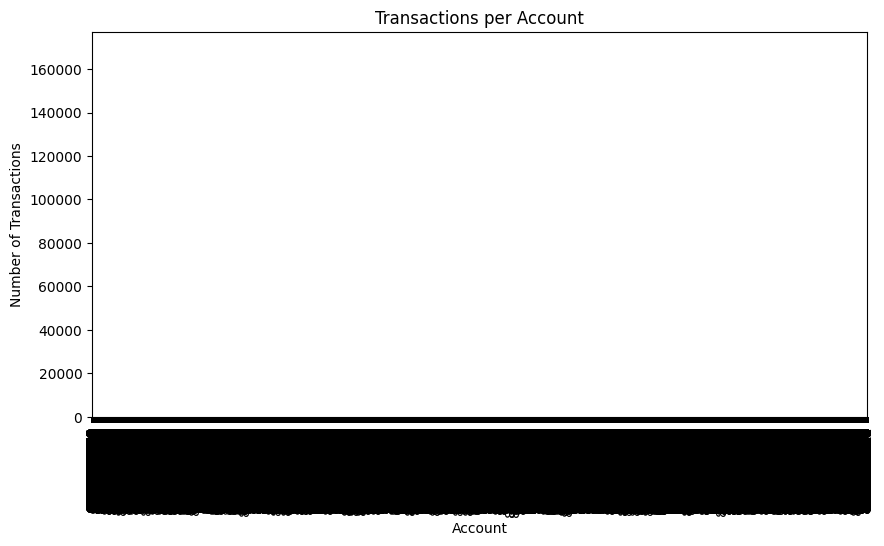

In [5]:
smurfing_transactions = df[df['Account'] != df['Account.1']]
smurfing_transactions.to_csv('Transaksi_Smurfing.csv', index=False)
transaction_counts = smurfing_transactions['Account'].value_counts()
transaction_counts.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Account')
plt.ylabel('Number of Transactions')
plt.title('Transactions per Account')
plt.savefig('Transactions_per_Account.png')
plt.show()